In [20]:
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os
import pandas as pd
import numpy as np
from datetime import datetime
import sys

In [21]:
# Get the current working directory (which should be 'notebooks/')
current_dir = os.getcwd()

# Get the parent directory
parent_dir = os.path.dirname(current_dir)

# Add the 'data' directory to the path
sys.path.insert(0, os.path.join(parent_dir, 'data'))

# Now you can import your module
from measurments import get_measurments


# 1. Connection Settings

In [22]:
# Load .env file
load_dotenv()

# Get the EC2 tracking server host from the environment variable
EC2_TRACKING_SERVER_HOST = os.getenv('EC2_TRACKING_SERVER_HOST')
EC2_ENDPOINT = f"http://{EC2_TRACKING_SERVER_HOST}:8000"

# Parameters for the RDS PostgreSQL instance
PG_HOST = os.getenv('PG_HOST')
PG_PORT = os.getenv('PG_PORT')
PG_DATABASE = os.getenv('PG_DATABASE')
PG_USER = os.getenv('PG_USER')
PG_PASSWORD = os.getenv('PG_PASSWORD')

# Create the MySQL database connection string
db_url = f'postgresql+psycopg2://{PG_USER}:{PG_PASSWORD}@{PG_HOST}:{PG_PORT}/{PG_DATABASE}'

In [23]:
def ingest_rds(df, table_name, mode):
    engine = create_engine(db_url)
    connection = engine.connect()
    df.to_sql(table_name, engine, if_exists=mode, index=False)
    connection.close()

In [28]:
df = pd.DataFrame({
    'model_name': ['xgboost-8features-hpt', 'xgboost-8features-hpt-guster3'],
    'retrained_date': [datetime(2023,11,5,23,0,14) , datetime(2023,11,5,23,2,31)]  # Gets today's date
})

In [29]:
ingest_rds(df, 'table_update_rewa', 'append')

In [24]:
def select_from_rds(query):
    engine = create_engine(db_url)
    connection = engine.connect()
    df = pd.read_sql(query, connection)
    connection.close()
    return df

In [30]:
select_from_rds('select * from table_update_rewa')

,model_name,retrained_date
0,xgboost-8features-hpt,2023-11-05 23:00:14
1,xgboost-8features-hpt-guster3,2023-11-05 23:02:31
2,xgboost-8features-hpt,2023-11-05 23:00:14
3,xgboost-8features-hpt-guster3,2023-11-05 23:02:31


In [58]:
df_m = select_from_rds('select * from measurments_rewa')
df_m['Time'].max()

Timestamp('2023-11-09 21:00:00')

In [62]:
df_m.sort_values(by='Time', ascending=False).head(50)

,Time,WindSpeed,WindGust,Temp,WindDir,Baro,Update
136569,2023-11-09 21:00:00,7.19,11.86,NaN,NaN,NaN,2023-11-09 20:00:23.003642
136568,2023-11-09 20:50:00,7.97,13.22,NaN,NaN,NaN,2023-11-09 20:00:23.003642
136567,2023-11-09 20:40:00,6.03,11.27,NaN,NaN,NaN,2023-11-09 20:00:23.003642
136566,2023-11-09 20:30:00,3.89,13.22,NaN,NaN,NaN,2023-11-09 20:00:23.003642
136565,2023-11-09 20:20:00,3.89,11.27,NaN,NaN,NaN,2023-11-09 20:00:23.003642
136564,2023-11-09 20:10:00,5.25,11.27,NaN,NaN,NaN,2023-11-09 20:00:23.003642
136563,2023-11-09 20:00:00,4.67,9.33,NaN,NaN,NaN,2023-11-09 20:00:23.003642
136562,2023-11-09 19:50:00,4.67,9.91,NaN,NaN,NaN,2023-11-09 20:00:23.003642
136561,2023-11-09 19:40:00,6.03,9.91,NaN,NaN,NaN,2023-11-09 20:00:23.003642
136560,2023-11-09 19:30:00,3.89,6.03,NaN,NaN,NaN,2023-11-09 20:00:23.003642


In [28]:
df = select_from_rds(query='select * from model_versions')

# 2. Kuznica setup

In [7]:
df_measurments_kuznica = get_measurments(station = 'kuznica',past_days=1020)

/Users/krystianpietrzak/Documents/ML/WindPRO/data/measurments.py:80: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,df_i])


In [11]:
ingest_rds(df_measurments_kuznica, 'measurments_kuznica', 'replace')

In [17]:
df_measurments = select_from_rds('select * from measurments_kuznica')
df_measurments

,Time,WindSpeed,WindGust,Update
0,2021-01-23 00:00:00,7.19,7.97,2023-11-09 18:51:40.594281
1,2021-01-23 00:10:00,7.19,7.97,2023-11-09 18:51:40.594281
2,2021-01-23 00:20:00,7.19,7.97,2023-11-09 18:51:40.594281
3,2021-01-23 00:30:00,7.19,7.97,2023-11-09 18:51:40.594281
4,2021-01-23 00:40:00,7.19,7.97,2023-11-09 18:51:40.594281
...,...,...,...,...
143667,2023-11-09 01:30:00,10.50,13.80,2023-11-09 18:51:40.594281
143668,2023-11-09 01:40:00,9.91,11.86,2023-11-09 18:51:40.594281
143669,2023-11-09 01:50:00,9.91,13.22,2023-11-09 18:51:40.594281
143670,2023-11-09 02:00:00,8.55,11.86,2023-11-09 18:51:40.594281


In [18]:
df_forecast = select_from_rds('select * from forecast')
df_forecast

,Time,Month,Hour,WindForecast,GustForecast,WindDirForecast,Temperature,Precipitation,Cloudcover,Update
0,2021-01-01 02:00:00,1,2,7.0,12.00,191.0,2.00,0.0,97.0,2023-10-03
1,2021-01-01 04:00:00,1,4,7.0,11.00,184.0,2.00,0.0,26.0,2023-10-03
2,2021-01-01 06:00:00,1,6,8.0,12.00,171.0,2.00,0.0,100.0,2023-10-03
3,2021-01-01 08:00:00,1,8,9.0,13.00,166.0,2.00,0.0,100.0,2023-10-03
4,2021-01-01 10:00:00,1,10,9.0,14.00,164.0,2.00,0.0,100.0,2023-10-03
...,...,...,...,...,...,...,...,...,...,...
12138,2023-10-30 14:00:00,10,14,9.2,17.20,228.5,13.50,0.0,100.0,2023-10-30
12139,2023-10-30 16:00:00,10,16,6.7,11.45,205.0,11.75,0.0,100.0,2023-10-30
12140,2023-10-30 18:00:00,10,18,8.0,18.00,196.5,10.75,0.0,98.0,2023-10-30
12141,2023-10-30 20:00:00,10,20,7.0,17.10,199.0,10.45,0.0,100.0,2023-10-30


In [19]:
# Set the 'Time' column as the index
df_measurments.set_index('Time', inplace=True)

# Resample the data with a two-hour interval and apply mean aggregation
df_measurments = df_measurments.resample('2H').mean()

df_measurments.reset_index(inplace=True)

df = pd.merge(left=df_forecast, right=df_measurments, on='Time', how='inner')

df.dropna(inplace=True)
df

,Time,Month,Hour,WindForecast,GustForecast,WindDirForecast,Temperature,Precipitation,Cloudcover,Update_x,WindSpeed,WindGust,Update_y
3,2021-01-23 00:00:00,1,0,5.00,10.00,208.0,4.00,0.00,100.0,2023-10-03,7.368333,8.438333,2023-11-09 18:51:40.594281216
4,2021-01-23 02:00:00,1,2,7.00,17.00,237.0,3.00,0.00,100.0,2023-10-03,7.208333,8.697500,2023-11-09 18:51:40.594281216
5,2021-01-23 04:00:00,1,4,9.00,19.00,243.0,3.00,0.00,74.0,2023-10-03,3.920000,5.670833,2023-11-09 18:51:40.594281216
6,2021-01-23 06:00:00,1,6,8.00,16.00,237.0,2.00,0.00,99.0,2023-10-03,6.010000,8.342500,2023-11-09 18:51:40.594281216
7,2021-01-23 08:00:00,1,8,4.00,7.00,206.0,2.00,0.00,98.0,2023-10-03,2.363333,3.547500,2023-11-09 18:51:40.594281216
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11875,2023-11-08 14:00:00,11,14,11.55,19.65,226.5,8.70,0.95,100.0,2023-11-08,12.150000,16.295833,2023-11-09 18:51:40.594281216
11876,2023-11-08 16:00:00,11,16,13.95,23.60,239.0,8.95,0.15,97.5,2023-11-08,12.115000,15.372500,2023-11-09 18:51:40.594281216
11877,2023-11-08 18:00:00,11,18,14.35,24.30,246.5,8.85,0.05,98.5,2023-11-08,14.627500,18.205000,2023-11-09 18:51:40.594281216
11878,2023-11-08 20:00:00,11,20,14.65,24.50,245.5,8.75,0.00,98.0,2023-11-08,14.158333,17.607500,2023-11-09 18:51:40.594281216


# MLFLOW exploration

In [27]:
df_metrics = select_from_rds('select * from latest_metrics')
df_metrics

,key,value,timestamp,step,is_nan,run_uuid
0,average_accuracy,0.686916,1698957616332,0,False,b787df1c8d9d432281877eb8890b26c0
1,std_accuracy,0.012789,1698957616357,0,False,b787df1c8d9d432281877eb8890b26c0
2,test_accuracy,-0.130344,1698957980806,0,False,7bd15d59f1124bbd9cd059d14614d005
3,forecast_accuracy,-1.076900,1698957980824,0,False,7bd15d59f1124bbd9cd059d14614d005
4,average_accuracy,0.686916,1699165168331,0,False,e158b6f7ca394f13bb69740945c65473
...,...,...,...,...,...,...
151,test_accuracy,0.277896,1700082031354,0,False,e982b90089144fe5926ac166748f3378
152,forecast_accuracy,-0.001191,1700078420227,0,False,c472898f8b1346558b7159e92ccf3299
153,test_accuracy,0.520839,1700078433158,0,False,6bd8b39e40bf4e2a8e2e2c0ee2d9f28b
154,test_accuracy,0.392798,1700082018439,0,False,8877f76157bf48f1ab03a8d663197aa2


In [26]:
df_runs = select_from_rds('select * from runs')
df_runs

,run_uuid,name,source_type,source_name,entry_point_name,user_id,status,start_time,end_time,source_version,lifecycle_stage,artifact_uri,experiment_id,deleted_time
0,b787df1c8d9d432281877eb8890b26c0,retrain_run_prod_2023-11-02-20-07,UNKNOWN,,,root,FINISHED,1698957607266,1.698958e+12,,active,s3://mlflow-artifacts-krystianpi/b787df1c8d9d4...,1,NaN
1,7bd15d59f1124bbd9cd059d14614d005,test_run_prod_2023-11-02-20-07,UNKNOWN,,,root,FINISHED,1698957954422,1.698958e+12,,active,s3://mlflow-artifacts-krystianpi/7bd15d59f1124...,1,NaN
2,d7eaf1815aad48b2aab66ddd32ec40eb,pred_run_prod_2023-11-02-20-07,UNKNOWN,,,root,FINISHED,1698958029576,1.698958e+12,,active,s3://mlflow-artifacts-krystianpi/d7eaf1815aad4...,1,NaN
3,bb6a1e2d68414beabb67f96e0620e644,pred_run_prod_2023-11-02-20-07,UNKNOWN,,,root,FINISHED,1698993947907,1.698994e+12,,active,s3://mlflow-artifacts-krystianpi/bb6a1e2d68414...,1,NaN
4,ae58d1220a054f0eae2013fe3624c30a,pred_run_prod_2023-11-03-07-13,UNKNOWN,,,root,FINISHED,1698995764086,1.698996e+12,,active,s3://mlflow-artifacts-krystianpi/ae58d1220a054...,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,6bd8b39e40bf4e2a8e2e2c0ee2d9f28b,test_run_prod_2023-11-15-20-00,UNKNOWN,,,root,FINISHED,1700078420341,1.700078e+12,,active,s3://mlflow-artifacts-krystianpi/6bd8b39e40bf4...,1,NaN
143,8877f76157bf48f1ab03a8d663197aa2,test_run_prod_2023-11-15-21-00,UNKNOWN,,,root,FINISHED,1700082003943,1.700082e+12,,active,s3://mlflow-artifacts-krystianpi/8877f76157bf4...,1,NaN
144,e982b90089144fe5926ac166748f3378,test_run_prod_2023-11-15-21-00,UNKNOWN,,,root,FINISHED,1700082018566,1.700082e+12,,active,s3://mlflow-artifacts-krystianpi/e982b90089144...,1,NaN
145,8223509d708044b6b4475f495c1af979,pred_run_prod_2023-11-16-02-00,UNKNOWN,,,root,FINISHED,1700100004640,1.700100e+12,,active,s3://mlflow-artifacts-krystianpi/8223509d70804...,1,NaN


In [25]:
df_params =select_from_rds('select * from params')
df_params.rename(columns={'key': 'param', 'value': 'param_value'}, inplace=True)
df_params


,param,param_value,run_uuid
0,best_max_depth,3,b787df1c8d9d432281877eb8890b26c0
1,best_learning_rate,0.1,b787df1c8d9d432281877eb8890b26c0
2,best_n_estimators,50,b787df1c8d9d432281877eb8890b26c0
3,param_grid,"{'max_depth': [2, 3], 'learning_rate': [0.005,...",b787df1c8d9d432281877eb8890b26c0
4,best_max_depth,3,e158b6f7ca394f13bb69740945c65473
...,...,...,...
235,Date Range max,2023-11-15 22:00:00,8877f76157bf48f1ab03a8d663197aa2
236,model,gust,e982b90089144fe5926ac166748f3378
237,station,kuznica,e982b90089144fe5926ac166748f3378
238,Date Range min,2023-11-12 00:00:00,e982b90089144fe5926ac166748f3378


In [28]:
df_metrics_runs = pd.merge(left=df_metrics, right=df_runs, how='left', on='run_uuid')
df_metrics_runs = df_metrics_runs[df_metrics_runs['name'].str.contains('test')]
df_metrics_runs['date'] = df_metrics_runs['name'].str.extract(r'test_run_prod_(\d{4}-\d{2}-\d{2}-\d{2}-\d{2})')

# Convert the extracted string to a datetime object
df_metrics_runs['date'] = pd.to_datetime(df_metrics_runs['date'], format='%Y-%m-%d-%H-%M')
df_metrics_runs

,key,value,timestamp,step,is_nan,run_uuid,name,source_type,source_name,entry_point_name,user_id,status,start_time,end_time,source_version,lifecycle_stage,artifact_uri,experiment_id,deleted_time,date
2,test_accuracy,-0.130344,1698957980806,0,False,7bd15d59f1124bbd9cd059d14614d005,test_run_prod_2023-11-02-20-07,UNKNOWN,,,root,FINISHED,1698957954422,1.698958e+12,,active,s3://mlflow-artifacts-krystianpi/7bd15d59f1124...,1,NaN,2023-11-02 20:07:00
3,forecast_accuracy,-1.076900,1698957980824,0,False,7bd15d59f1124bbd9cd059d14614d005,test_run_prod_2023-11-02-20-07,UNKNOWN,,,root,FINISHED,1698957954422,1.698958e+12,,active,s3://mlflow-artifacts-krystianpi/7bd15d59f1124...,1,NaN,2023-11-02 20:07:00
22,test_accuracy,-0.222974,1699190774674,0,False,1d08d38fa5a14d948496fb070b662af9,test_run_prod_2023-11-05-09-58,UNKNOWN,,,root,FINISHED,1699190749266,1.699191e+12,,active,s3://mlflow-artifacts-krystianpi/1d08d38fa5a14...,42,NaN,2023-11-05 09:58:00
23,forecast_accuracy,-3.575082,1699190774694,0,False,1d08d38fa5a14d948496fb070b662af9,test_run_prod_2023-11-05-09-58,UNKNOWN,,,root,FINISHED,1699190749266,1.699191e+12,,active,s3://mlflow-artifacts-krystianpi/1d08d38fa5a14...,42,NaN,2023-11-05 09:58:00
24,test_accuracy,-0.222974,1699190927561,0,False,c23db979f7ff42278505b65af3e246b1,test_run_prod_2023-11-05-09-58,UNKNOWN,,,root,FINISHED,1699190902144,1.699191e+12,,active,s3://mlflow-artifacts-krystianpi/c23db979f7ff4...,42,NaN,2023-11-05 09:58:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,test_accuracy,0.277896,1700082031354,0,False,e982b90089144fe5926ac166748f3378,test_run_prod_2023-11-15-21-00,UNKNOWN,,,root,FINISHED,1700082018566,1.700082e+12,,active,s3://mlflow-artifacts-krystianpi/e982b90089144...,1,NaN,2023-11-15 21:00:00
152,forecast_accuracy,-0.001191,1700078420227,0,False,c472898f8b1346558b7159e92ccf3299,test_run_prod_2023-11-15-20-00,UNKNOWN,,,root,FINISHED,1700078405588,1.700078e+12,,active,s3://mlflow-artifacts-krystianpi/c472898f8b134...,1,NaN,2023-11-15 20:00:00
153,test_accuracy,0.520839,1700078433158,0,False,6bd8b39e40bf4e2a8e2e2c0ee2d9f28b,test_run_prod_2023-11-15-20-00,UNKNOWN,,,root,FINISHED,1700078420341,1.700078e+12,,active,s3://mlflow-artifacts-krystianpi/6bd8b39e40bf4...,1,NaN,2023-11-15 20:00:00
154,test_accuracy,0.392798,1700082018439,0,False,8877f76157bf48f1ab03a8d663197aa2,test_run_prod_2023-11-15-21-00,UNKNOWN,,,root,FINISHED,1700082003943,1.700082e+12,,active,s3://mlflow-artifacts-krystianpi/8877f76157bf4...,1,NaN,2023-11-15 21:00:00


In [67]:
df_joined = pd.merge(left=df_metrics_runs, right=df_params, how='left', on='run_uuid')
df_joined = df_joined[df_joined['param_value'].isin(['gust', 'base', 'rewa', 'kuznica'])]
df_accuracy = df_joined[['key','value','date','param_value','timestamp']].groupby('timestamp').agg({
                        'param_value': lambda x: ', '.join(map(str, x)),
                        'key': 'first',
                        'value': 'first',
                        'date': 'first'}).reset_index().sort_values(by='timestamp',ascending=False)

df_accuracy['timestamp'] = df_accuracy['timestamp'].astype(str)
df_accuracy['timestamp'] = df_accuracy['timestamp'].str[:7]
df_accuracy['timestamp'] = df_accuracy['timestamp'].astype(int)

df_accuracy_base_kuznica = df_accuracy[df_accuracy['param_value'] == 'base, kuznica']
df_accuracy_base_rewa = df_accuracy[df_accuracy['param_value'] == 'base, rewa']
df_accuracy_gust_kuznica = df_accuracy[df_accuracy['param_value'] == 'gust, kuznica']
df_accuracy_gust_rewa = df_accuracy[df_accuracy['param_value'] == 'gust, rewa']


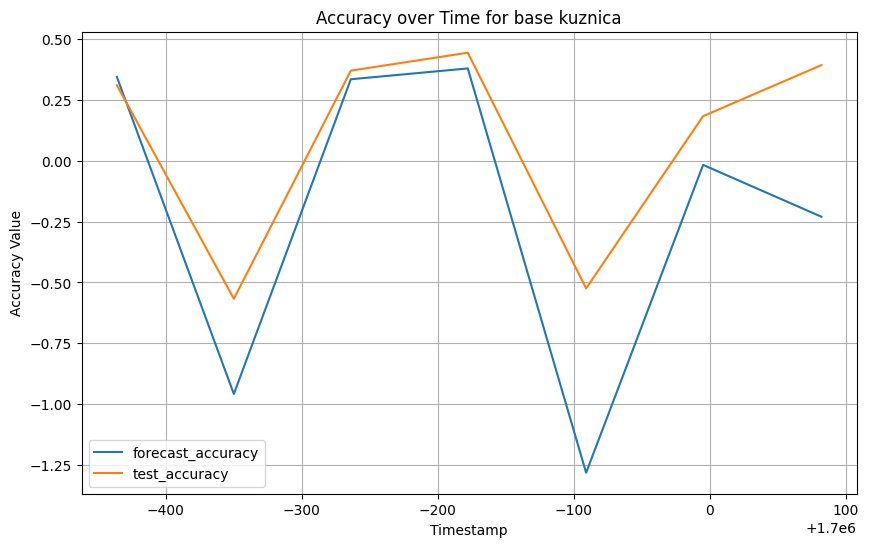

In [70]:
import matplotlib.pyplot as plt

# Convert timestamp to datetime
#df_accuracy['timestamp'] = pd.to_datetime(df_accuracy['timestamp'], unit='ms')

# Plotting
plt.figure(figsize=(10, 6))
for key in df_accuracy_base_kuznica['key'].unique():
    subset = df_accuracy_base_kuznica[df_accuracy_base_kuznica['key'] == key]
    plt.plot(subset['timestamp'], subset['value'], label=key)

plt.xlabel('Timestamp')
plt.ylabel('Accuracy Value')
plt.title('Accuracy over Time for base kuznica')
plt.legend()
plt.grid(True)
plt.show()

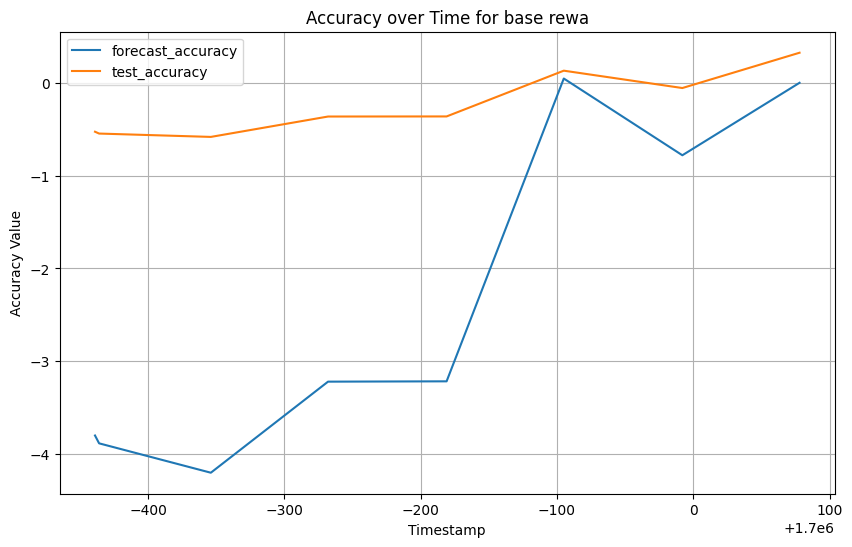

In [71]:
import matplotlib.pyplot as plt

# Convert timestamp to datetime
#df_accuracy['timestamp'] = pd.to_datetime(df_accuracy['timestamp'], unit='ms')

# Plotting
plt.figure(figsize=(10, 6))
for key in df_accuracy_base_rewa['key'].unique():
    subset = df_accuracy_base_rewa[df_accuracy_base_rewa['key'] == key]
    plt.plot(subset['timestamp'], subset['value'], label=key)

plt.xlabel('Timestamp')
plt.ylabel('Accuracy Value')
plt.title('Accuracy over Time for base rewa')
plt.legend()
plt.grid(True)
plt.show()

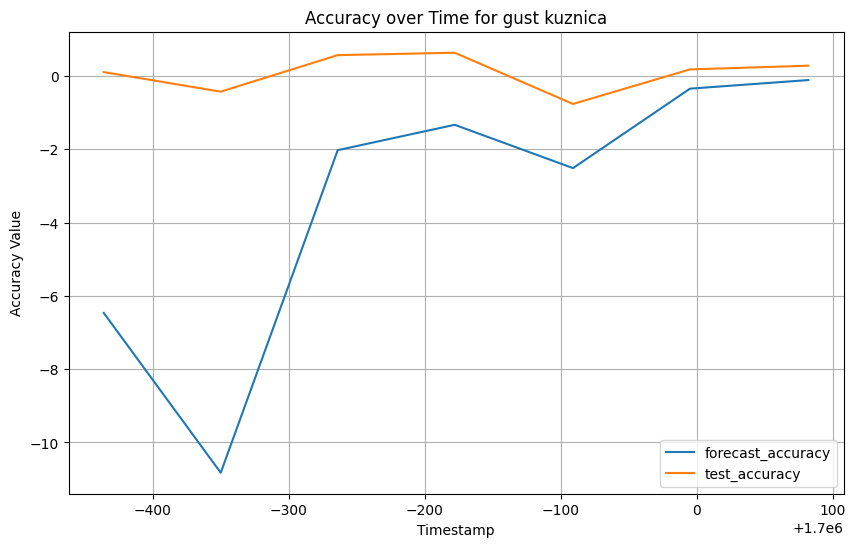

In [72]:
import matplotlib.pyplot as plt

# Convert timestamp to datetime
#df_accuracy['timestamp'] = pd.to_datetime(df_accuracy['timestamp'], unit='ms')

# Plotting
plt.figure(figsize=(10, 6))
for key in df_accuracy_gust_kuznica['key'].unique():
    subset = df_accuracy_gust_kuznica[df_accuracy_gust_kuznica['key'] == key]
    plt.plot(subset['timestamp'], subset['value'], label=key)

plt.xlabel('Timestamp')
plt.ylabel('Accuracy Value')
plt.title('Accuracy over Time for gust kuznica')
plt.legend()
plt.grid(True)
plt.show()

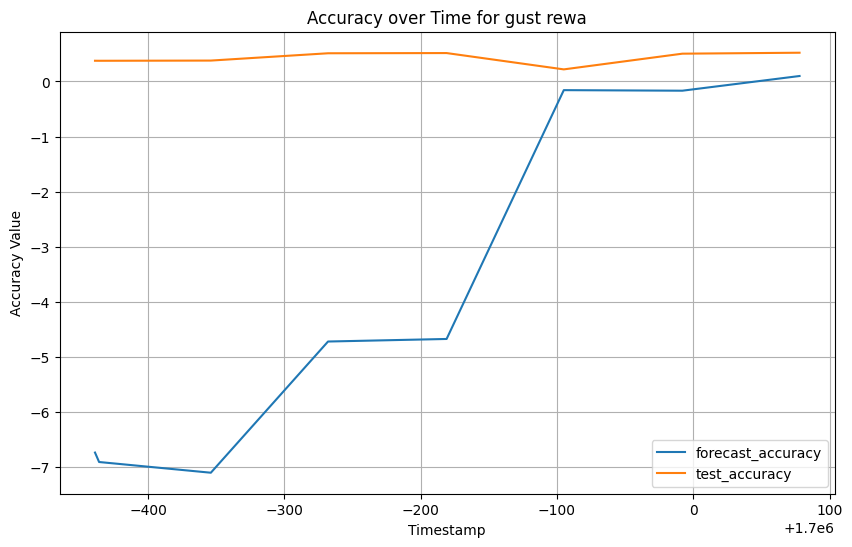

In [73]:
import matplotlib.pyplot as plt

# Convert timestamp to datetime
#df_accuracy['timestamp'] = pd.to_datetime(df_accuracy['timestamp'], unit='ms')

# Plotting
plt.figure(figsize=(10, 6))
for key in df_accuracy_gust_rewa['key'].unique():
    subset = df_accuracy_gust_rewa[df_accuracy_gust_rewa['key'] == key]
    plt.plot(subset['timestamp'], subset['value'], label=key)

plt.xlabel('Timestamp')
plt.ylabel('Accuracy Value')
plt.title('Accuracy over Time for gust rewa')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
df_joined[['key','value','date','param_value']].sort_values(by='date', ascending=False).head(4).pivot_table(
    values='value',
    index=['date', 'param_value'],
    columns='key',
    aggfunc='first'  # You can change this to 'mean' or other aggregation if you have multiple entries per group
)

key                              forecast_accuracy  test_accuracy
date                param_value                                  
2023-11-08 18:55:00 base                 -3.486521      -0.482413
                    gust                 -5.630637       0.391019

In [5]:
def get_config():
    # Load .env file
    load_dotenv()

    # Get the EC2 tracking server host from the environment variable
    EC2_TRACKING_SERVER_HOST = os.getenv('EC2_TRACKING_SERVER_HOST')
    EC2_ENDPOINT = f"http://{EC2_TRACKING_SERVER_HOST}:8000"

    # Parameters for the RDS PostgreSQL instance
    PG_HOST = os.getenv('PG_HOST')
    PG_PORT = os.getenv('PG_PORT')
    PG_DATABASE = os.getenv('PG_DATABASE')
    PG_USER = os.getenv('PG_USER')
    PG_PASSWORD = os.getenv('PG_PASSWORD')

    # Create the MySQL database connection string
    db_url = f'postgresql+psycopg2://{PG_USER}:{PG_PASSWORD}@{PG_HOST}:{PG_PORT}/{PG_DATABASE}'

    return db_url

def get_test_metrics():
    db_url = get_config()

    engine = create_engine(db_url)

    # Use the engine to connect to the database
    connection = engine.connect()

    df_metrics = pd.read_sql('select * from latest_metrics', connection)
    df_params = pd.read_sql('select * from params', connection)
    df_runs = pd.read_sql('select * from runs', connection)
    
    connection.close()

    df_params.rename(columns={'key': 'param', 'value': 'param_value'}, inplace=True)

    df_metrics_runs = pd.merge(left=df_metrics, right=df_runs, how='left', on='run_uuid')
    df_metrics_runs = df_metrics_runs[df_metrics_runs['name'].str.contains('test')].drop_duplicates()
    df_metrics_runs['date'] = df_metrics_runs['name'].str.extract(r'test_run_prod_(\d{4}-\d{2}-\d{2}-\d{2}-\d{2})')

    # Convert the extracted string to a datetime object
    df_metrics_runs['date'] = pd.to_datetime(df_metrics_runs['date'], format='%Y-%m-%d-%H-%M')

    df_joined = pd.merge(left=df_metrics_runs, right=df_params, how='inner', on='run_uuid')
    df_joined = df_joined[df_joined['param_value'].isin(['gust', 'base', 'rewa', 'kuznica'])]
    df_joined = df_joined.sort_values(by='date', ascending=False).head(16)
    print(df_joined)
    
    df_result = df_joined.groupby('timestamp').agg({
        'param_value': lambda x: ', '.join(map(str, x)),
        'key': 'first',
        'value': 'first'
    }).reset_index()[['param_value','key','value']]

    df_result['param_value'] = df_result['param_value'].apply(lambda x: ', '.join(sorted(x.split(', '))))
    df_result = df_result.pivot_table(index='param_value', columns='key', values='value').reset_index()[['param_value','forecast_accuracy','test_accuracy']]
    
    # df_result.rename(columns={'forecast_accuracy':'Forecast Accuracy', 'test_accuracy':'WindPRO Accuracy', 'param_value': 'Model'}, inplace = True )
    return df_result


get_test_metrics()
    

                   key      value      timestamp  step  is_nan  \
181  forecast_accuracy  -4.674963  1699819256754     0   False   
141  forecast_accuracy  -3.219166  1699732828761     0   False   
137      test_accuracy  -0.364534  1699732828740     0   False   
136      test_accuracy  -0.364534  1699732828740     0   False   
133  forecast_accuracy -10.824916  1699650019925     0   False   
132  forecast_accuracy -10.824916  1699650019925     0   False   
129      test_accuracy  -0.430157  1699650019908     0   False   
128      test_accuracy  -0.430157  1699650019908     0   False   
125  forecast_accuracy  -0.957942  1699650013110     0   False   
124  forecast_accuracy  -0.957942  1699650013110     0   False   
121      test_accuracy  -0.566975  1699650013094     0   False   
120      test_accuracy  -0.566975  1699650013094     0   False   
117  forecast_accuracy  -7.102849  1699646448195     0   False   
116  forecast_accuracy  -7.102849  1699646448195     0   False   
113      t

key,param_value,forecast_accuracy,test_accuracy
0,"base, kuznica",-0.957942,-0.566975
1,"base, rewa",NaN,-0.364534
2,"gust, kuznica",-10.824916,-0.430157
3,"gust, rewa",-7.102849,0.378307
4,rewa,-3.947065,NaN


In [110]:
from datetime import datetime, date
df = select_from_rds(f"""
        SELECT retrained_date FROM table_update_kuznica
        WHERE model_name = 'xgboost-8features-hpt-kuznica'
        ORDER BY retrained_date DESC
        LIMIT 1;
        """)
last_date = df.iloc[0]['retrained_date']
if isinstance(last_date, date):
        last_date = pd.to_datetime(last_date)

type(last_date)


pandas._libs.tslibs.timestamps.Timestamp

In [111]:
df = select_from_rds(f"""
        SELECT retrained_date FROM table_update_rewa
        WHERE model_name = 'xgboost-8features-hpt'
        ORDER BY retrained_date DESC
        LIMIT 1;
        """)
last_date = df.iloc[0]['retrained_date']
if isinstance(last_date, date):
        last_date = pd.to_datetime(last_date)

type(last_date)

pandas._libs.tslibs.timestamps.Timestamp

In [96]:
select_from_rds('select * from table_update_kuznica')

,model_name,retrained_date
0,xgboost-8features-hpt-kuznica,2023-11-09
1,xgboost-8features-hpt-guster-kuznica,2023-11-09
